In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import clean data
gr_data = pd.read_csv('./2. Clean_df/gr_data_CLEAN.csv')
gr_data = gr_data.drop(['Unnamed: 0'],axis=1)

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

display(gr_data.head(), gr_data.shape)

,title,series,author,description,language,pages,isbn,book_format,publish_year,first_publish_year,publisher,liked_perc,bbe_score,bbe_votes,log_num_ratings,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,rating,fantasy,science fiction,dystopia,young adult,fiction,action,adventure,romance,magic,children,audiobook,school,classics,historical fiction,novels,literature,historical,historical romance,adult,urban fantasy,paranormal,paranormal romance,vampires,holocaust,war,politics,christian fiction,christianity,epic fantasy,civil war,love,drama,coming of age,contemporary,comedy,humor,poetry,picture books,short stories,gothic,mystery,thriller,suspense,crime,mystery thriller,asian countries,asia,horror,european literature,european countries,plays,esoterica,philosophy,self help,inspirational,mental health,north american countries,angels,chick lit,animals,chapter books,magical realism,time travel,iberoamerican literature,fairy tales,greek mythology,mythology,dragons,epic,monsters,gastronomy,food and nutrition,feminism,unfinished,music and musicians,medieval,apocalyptic,detective,victorian,mental illness,psychology,family,african american literature,new york,religion,ireland,nonfiction,history,memoires and biographies,eastern religions and faith,africa,steampunk,economics,contemporary romance,womens,lgtbi and queer,young adult fantasy,travel,young adult contemporary,storytime,mathematics,counting,true crime,cats,westerns,superheroes,graphic novel and comics,world war i,australia,christmas,science,arthurian,banned books,pirates,erotica,prehistoric,witches,retellings,asian literature,tudor period,media tie in,dinosaurs,religion studies,werewolves,portugal,southern,southern gothic,journalism,race,speculative fiction,survival,college,tragedy,african countries,ancient history,abuse,guides and travel,the united states of america,reference,space,military fiction,anthologies,childrens classics,essays,cyberpunk,fae,african literature,legal thriller,physics,death,music,islam,ghosts,regency,germany,collections,judaism,true story,aliens,law,biology,evolution,anthropology,political science,futuristic,french revolution,alternate history,american history,christian romance,robots,ancient,dark,fairies,folklore,zombies,education,demons,mountaineering,sports,medical,medicine,theory,academic,unicorns,business,leadership,new age,personal development,horse racing,american civil war,espionage,social justice and activism,astronomy,american revolution,presidents,gender,greece,nobel prize,noir,native americans,writing,love story,sociology,business and finance,social science,health,disability,halloween,communication,relationships,aviation,romanticism,israel,european history,productivity,management,fighters,psychological thriller,mythology and fairy tales,outdoors,murder mystery,shapeshifters,marriage,architecture,animal fiction,m m romance,south american countries,fashion,programming and computer science,cults,weird fiction,lovecraftian,cultural,dark fantasy,north american literature,historical mystery,batman,americana,genetics,romantic suspense,emotion,womens fiction,new weird,hugo awards,diary and journal,buisness,sports romance,polygamy,entrepreneurship,money,personal finance,baseball,young adult paranormal,crafts,spy thriller,elves,plants,police,archaeology,gardening,historical fantasy,conspiracy theories,world history,medieval history,military history,ecology,sustainability,technology,gaming,utopia,linguistics,rabbits,manga,comic fantasy,ghost stories,amazon,poverty,parenting,hard boiled,aspergers,social,nordic noir,gender studies,wildlife,anime,shojo,counter culture,illness,time travel romance,young adult historical fiction,cartoon,artificial intelligence,heroic fantasy,forgotten realms,dragonlance,amish,modern,geography,doctors,chess,martial arts,engineering,pop culture,pulp,wizards,adoption,hockey,teaching,boarding school,star wars,fitness,fantasy romance,natural history,fan fiction,mermaids,society,mormonism

(48655, 862)

## Exploratory Data Analysis

#### Target to predict: rating

In [4]:
gr_data.rating

0        4.33
1        4.50
2        4.28
3        4.26
4        3.60
         ... 
48650    4.16
48651    4.19
48652    3.70
48653    3.85
48654    4.02
Name: rating, Length: 48655, dtype: float64

In [5]:
gr_data.rating.describe()

count    48655.000000
mean         4.015514
std          0.347446
min          0.000000
25%          3.820000
50%          4.020000
75%          4.220000
max          5.000000
Name: rating, dtype: float64

#### Title

In [6]:
# Top 20 rated books
top_20 = gr_data.nlargest(20, 'rating')
top_20[['title', 'rating']]

,title,rating
3902,Gris Ange 2014,5.0
3921,Das geheimnis der blumen (DEU),5.0
4307,Obscured Darkness (Family Secrets #2),5.0
4995,Rosto Inacabado (Pequenos segredos alquímicos)...,5.0
5576,Females of Valor,5.0
6664,Patience's Love,5.0
8433,Abstraction In Theory - Laws Of Physical Trans...,5.0
8764,Le Poinçon « Pilot Edition »,5.0
10073,Of Just the Two of Us,5.0
10454,Liam: Midsummer's Magic Bonus Book,5.0


In [7]:
# Count number of books with rating 4.5 or more
num_top_rated_books = (gr_data['rating'] >= 5).sum()

print(f"Number of books with a rating of 5: {num_top_rated_books}")

Number of books with a rating of 5: 635


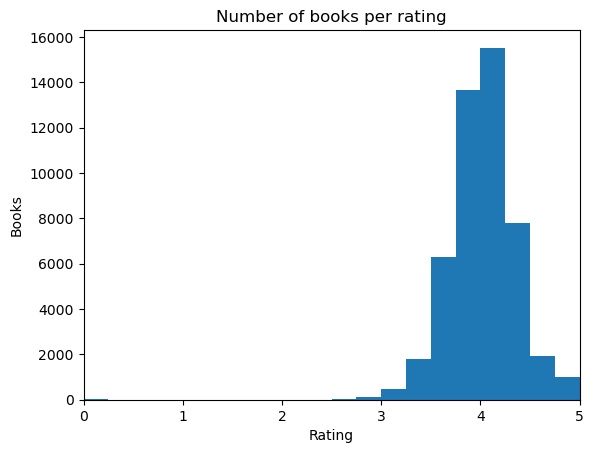

In [8]:
# Plot histogram number of books/Rating
plt.hist(gr_data['rating'], bins=20)
plt.xlim(0, 5)
plt.xlabel('Rating')
plt.ylabel('Books')
plt.title('Number of books per rating')
plt.show()

In [9]:
num_zero_ratings = gr_data[gr_data['rating'] == 0]['title'].count()
print(f"Number of titles with a rating of 0: {num_zero_ratings}")

Number of titles with a rating of 0: 44


#### Series

In [10]:
# Book included in some series or not

# Group by 'series'
series_group = gr_data.groupby('series')

# Average rating for titles with a series value other than 'Single Book'
avg_rating_series = round(gr_data[gr_data['series'] != 'Single Book']['rating'].mean(), 2)

# Average rating for titles with a series value of 'Single Book'
avg_rating_single = round(gr_data[gr_data['series'] == 'Single Book']['rating'].mean(), 2)

print("Average rating for titles included in a series:", avg_rating_series)
print("Average rating for titles not included in any series:", avg_rating_single)

Average rating for titles included in a series: 4.07
Average rating for titles not included in any series: 3.99


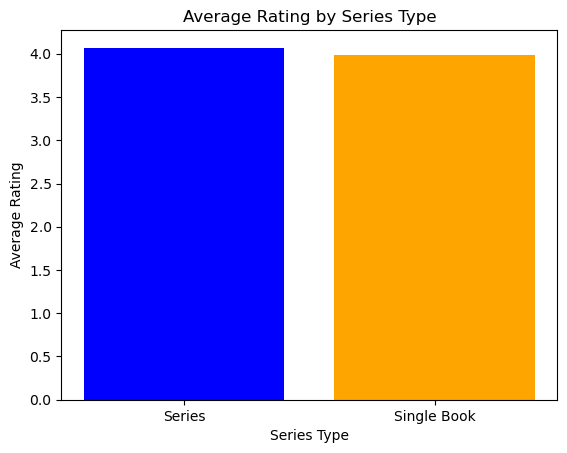

In [11]:
# Plot bar chart
plt.bar(['Series', 'Single Book'], [avg_rating_series, avg_rating_single], color=['blue', 'orange'])

# Title and axis labels
plt.title('Average Rating by Series Type')
plt.xlabel('Series Type')
plt.ylabel('Average Rating')
plt.show()

Being part of a literary series or saga seems not to affect in a significant way average rating (+ 0,08).

In [12]:
# Calculate the average rating per series
series_avg_rating = gr_data.groupby('series')['rating'].mean()

# Count the number of titles per series
series_title_counts = gr_data.groupby('series').size()

# Create a DataFrame from the series_avg_rating and series_title_counts
df_avg_rating = pd.DataFrame({
    'series': series_avg_rating.index,
    'avg_rating': series_avg_rating.values,
    'title_count': series_title_counts.values
})

# Displaying top 20 rated literary series
top_20 = df_avg_rating.nlargest(20, 'avg_rating')
top_20

,series,avg_rating,title_count
1071,Essie Brown,5.000000,2
4331,Zoe The Earless Kitten,5.000000,2
2179,Montgomery Lake High,4.946000,5
3107,The Adventures of Princess Lizzie,4.933333,3
3486,The L & L Mysteries,4.933333,3
4135,Voxian,4.930000,1
1888,Less Than Three,4.910000,4
1558,Imagination,4.900000,2
3958,Time Will Reveal,4.896667,3
4363,Сливенската трилогия,4.873333,3


#### Book Format

In [13]:
# Book format and rating

# Average rating for unique book_format
avg_rating_format = gr_data.groupby('book_format')['rating'].mean().round(2)

# Dataframe
df_avg_rating_format = pd.DataFrame({'book_format': avg_rating_format.index, 'avg_rating': avg_rating_format.values})

# New column to hold the count of books per format
df_avg_rating_format['title'] = gr_data.groupby('book_format').size().values

# Sort by rating
df_avg_rating_format.sort_values(by='avg_rating', ascending=False, inplace=True)

df_avg_rating_format

,book_format,avg_rating,title
2,Boxset,4.42,6
4,Graphic Novel and Comic,4.32,26
8,Special Edition,4.26,31
1,Boardbook,4.12,37
3,Ebook,4.10,7469
6,Other formats,4.10,32
0,Audio,4.04,176
7,Paperback,4.00,28859
5,Hardcover,3.99,11920
9,Unknown,3.95,99


In [14]:
# Mean of the 'avg_rating' column
avg_rating_mean = round(df_avg_rating_format['avg_rating'].mean(), 2)
print(f"Mean of 'avg_rating' column: {avg_rating_mean}")

Mean of 'avg_rating' column: 4.13


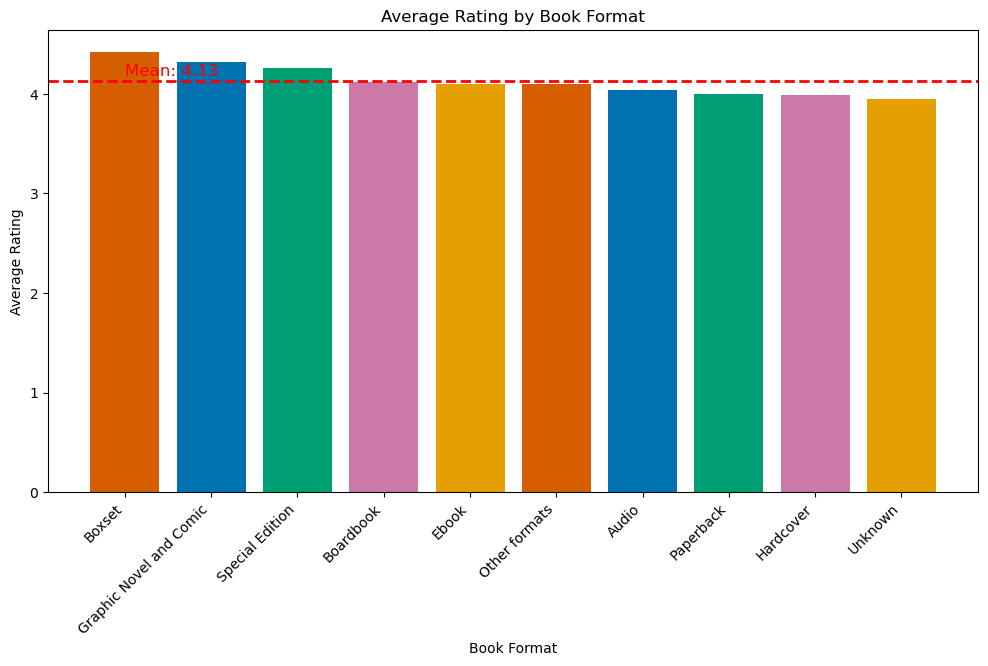

In [15]:
# Bar chart

# Set figsize to (width, height) and colors
fig, ax = plt.subplots(figsize=(12, 6))  
ax.bar(df_avg_rating_format['book_format'], df_avg_rating_format['avg_rating'], color=['#D55E00', '#0072B2', '#009E73', '#CC79A7', '#E69F00'])

# Add a horizontal line for the mean of the 'avg_rating' column
ax.axhline(avg_rating_mean, color='red', linestyle='--', linewidth=2)

# Add a label for the mean value
ax.text(0, avg_rating_mean + 0.05, f'Mean: {avg_rating_mean:.2f}', color='red', fontsize=12)

# Set chart title and axis labels
ax.set_title('Average Rating by Book Format')
ax.set_xlabel('Book Format')
ax.set_ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


More elaborated book formats, such as 'Boxset', 'Graphic Novel and Comic', or 'Special Edition', have slightly above-average ratings compared to all book formats.

#### Language

In [16]:
gr_data['language'].nunique()

92

In [17]:
# Group by unique language and get count of titles and average rating
gr_language = gr_data.groupby('language').agg({'title': 'count', 'rating': 'mean'})

# Dataframe
df_language = pd.DataFrame({'language': gr_language.index, 'count': gr_language['title'], 'avg_rating': gr_language['rating']})

# Calculate percentage over total title count
df_language['percentage'] = round((df_language['count'] / df_language['count'].sum()) * 100, 2)

# Sort by count in descending order
df_language = df_language.sort_values('count', ascending=False)

df_language = df_language[['language','count','percentage','avg_rating']]

# Reset index and rename language column
df_language = df_language.reset_index(drop=True).rename(columns={'language': 'Language'})

df_language.head(20)


,Language,count,percentage,avg_rating
0,English,43415,89.23,4.021036
1,Arabic,894,1.84,3.862204
2,Spanish,632,1.30,3.979810
3,French,562,1.16,3.939698
4,German,501,1.03,3.960319
5,Portuguese,335,0.69,4.022746
6,Indonesian,239,0.49,3.951590
7,Italian,234,0.48,3.903974
8,Dutch,200,0.41,3.809300
9,Turkish,155,0.32,4.063355


In [18]:
# Group by unique language and get count of titles and average rating
gr_language = gr_data.groupby('language').agg({'title': 'count', 'rating': 'mean'})

# Dataframe
df_language = pd.DataFrame({'language': gr_language.index, 'count': gr_language['title'], 'avg_rating': gr_language['rating']})

# Calculate percentage over total title count
df_language['percentage'] = round((df_language['count'] / df_language['count'].sum()) * 100, 2)

# Sort by count in descending order
df_language = df_language.sort_values('count', ascending=False)

# Reset index and rename language column
df_language = df_language.reset_index(drop=True).rename(columns={'language': 'Language'})

# Top 5 languages
df_language_count_top5 = df_language.head(5)

# New row for other languages
other_count = df_language['count'].sum() - df_language_count_top5['count'].sum()
df_other = pd.DataFrame({'Language': ['Other languages'], 'count': [other_count]})

# Concatenate the top 5 languages and the other languages into a single dataframe
df_languages = pd.concat([df_language_count_top5, df_other]).reset_index(drop=True)

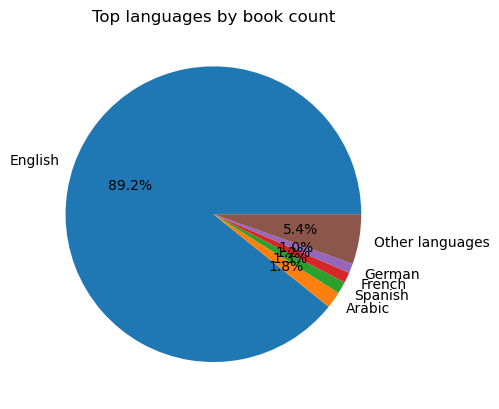

In [19]:
# Create a list of languages to display
languages = df_language_count_top5['Language'].tolist()
languages.append('Other languages')

# Create a list of counts for each language
counts = df_language_count_top5['count'].tolist()
counts.append(other_count)

# Plot pie chart
plt.pie(counts, labels=languages, autopct='%1.1f%%')

# Set title
plt.title('Top languages by book count')

# Show plot
plt.show()


 'English' language dominates overwhelmingly with 89% of the catalog of books published on GoodReads.

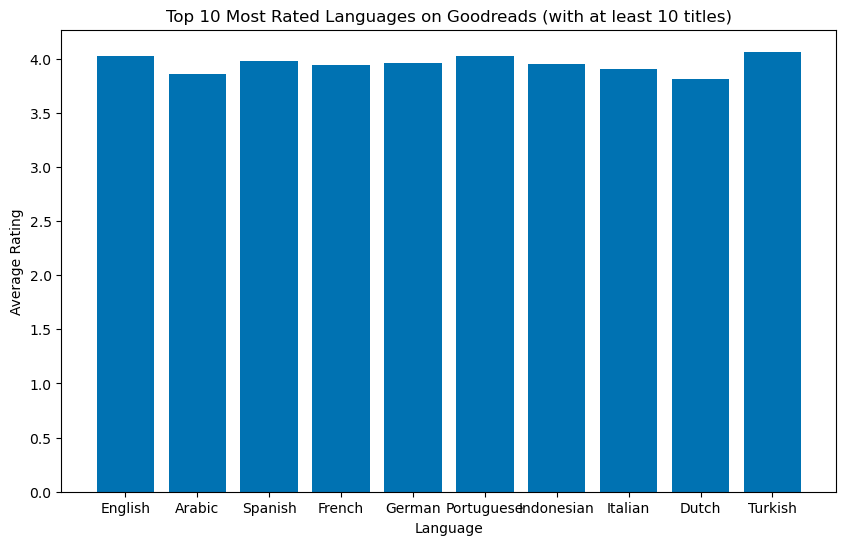

In [20]:
# Top 10 most rated languages with at least 10 titles
top_10_languages = df_language[df_language['count'] > 10].head(10)

# Bar plot
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(top_10_languages['Language'], top_10_languages['avg_rating'], color='#0072B2')

# Labels and title
ax.set_xlabel('Language')
ax.set_ylabel('Average Rating')
ax.set_title('Top 10 Most Rated Languages on Goodreads (with at least 10 titles)')

plt.show()


#### Pages

In [21]:
# Group by 'pages' and calculate count and average rating
grouped_data = gr_data.groupby('pages').agg({'title': 'count', 'rating': 'mean'})
grouped_data = grouped_data.rename(columns={'title': 'count', 'rating': 'avg_rating'})

# Calculate percentage of books in each group
total_books = gr_data['title'].count()
grouped_data['percentage'] = grouped_data['count'].apply(lambda x: (x / total_books) * 100).round(2)

grouped_data = grouped_data.sort_values(by='avg_rating', ascending=False)

grouped_data = grouped_data[['count','percentage','avg_rating']]

grouped_data


,count,percentage,avg_rating
pages,,,
>1000,112,0.23,4.475268
900-1000,516,1.06,4.316473
800-900,215,0.44,4.247070
700-800,341,0.70,4.198006
600-700,643,1.32,4.153266
500-600,1119,2.30,4.127426
Unknown,3466,7.12,4.099010
400-500,2393,4.92,4.082863
300-400,5881,12.09,4.026616


In [22]:
gr_data['pages'].unique()

array(['200-300', '700-800', '100-200', '400-500', '<100', '600-700',
       '900-1000', 'Unknown', '300-400', '500-600', '800-900', '>1000'],
      dtype=object)

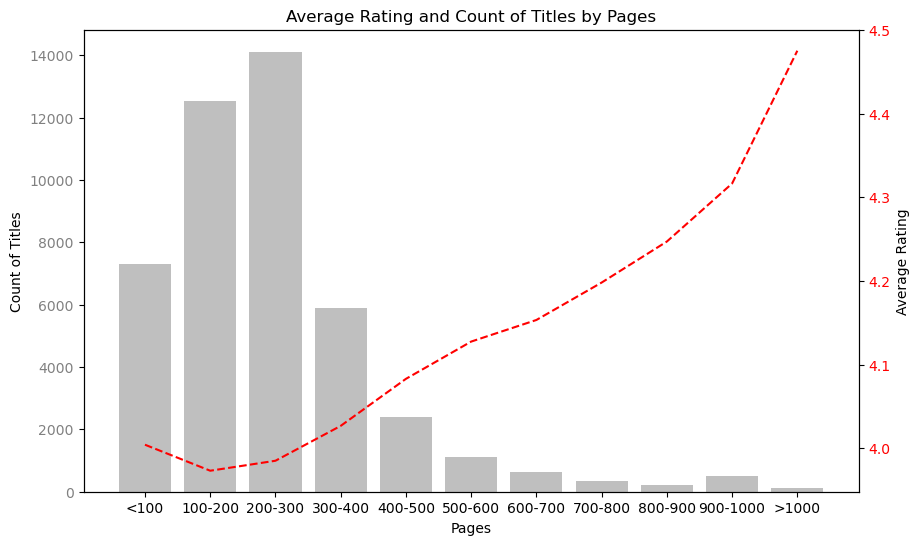

In [23]:
# Exclude 'unknown' category
grouped_data = grouped_data[grouped_data.index != 'unknown']

# Order for the x-axis categories
category_order = ['<100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '>1000']

# Figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bars for the count of titles
ax1.bar(category_order, grouped_data.loc[category_order, 'count'], color='gray', alpha=0.5)
ax1.set_xlabel('Pages')
ax1.set_ylabel('Count of Titles')
ax1.tick_params(axis='y', labelcolor='gray')

# Twin Axes for the line plot of the average rating
ax2 = ax1.twinx()
ax2.plot(category_order, grouped_data.loc[category_order, 'avg_rating'], color='red', linestyle='--')
ax2.set_ylabel('Average Rating')
ax2.tick_params(axis='y', labelcolor='red')

# Title
ax1.set_title('Average Rating and Count of Titles by Pages')

plt.show()


There appears to be a clear correlation between book length and rating, with longer books tending to receive higher ratings.

In [24]:
# Group by book format and calculate average pages, excluding 'unknown'
format_pages = gr_data.groupby(['book_format', 'pages'])['title'].count()
format_pages

book_format              pages   
Audio                    100-200       15
                         200-300       15
                         300-400        4
                         400-500        3
                         600-700        2
                         700-800        1
                         800-900        1
                         900-1000       2
                         <100           4
                         Unknown      129
Boardbook                100-200        1
                         300-400        1
                         900-1000       1
                         <100           2
                         Unknown       32
Boxset                   100-200        1
                         900-1000       3
                         >1000          2
Ebook                    100-200     2009
                         200-300     2008
                         300-400      696
                         400-500      234
                         500-600       93


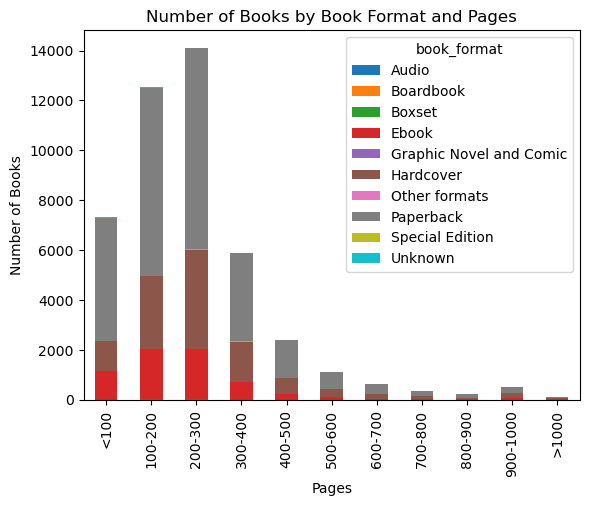

In [25]:
# Make a copy of the original dataframe to avoid modifying it
gr_data_filtered = gr_data[gr_data['pages'] != 'Unknown'].copy()

# Define category order for the x-axis
category_order = ['<100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '>1000']

# Create a categorical data type for the 'pages' column using the desired category order
page_categories = pd.api.types.CategoricalDtype(categories=category_order, ordered=True)
gr_data_filtered['pages'] = gr_data_filtered['pages'].astype(page_categories)

# Group by book format and pages, then count titles in each group
grouped = gr_data_filtered.groupby(['book_format', 'pages'])['title'].count().reset_index()

# Pivot the data so that book formats become columns and pages become rows
pivoted = grouped.pivot(index='pages', columns='book_format', values='title')

# Set the figure size
# plt.figure(figsize=(20,12))

# Plot the data as a stacked bar chart
pivoted.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Pages')
plt.ylabel('Number of Books')
plt.title('Number of Books by Book Format and Pages')

# Display the chart
plt.show()


## Publish year

In [26]:
grouped_data = gr_data.groupby('publish_year').agg({'title': 'count', 'rating': 'mean'})
grouped_data = grouped_data.rename(columns={'title': 'count', 'rating': 'avg_rating'})
grouped_data = grouped_data.sort_values(by='publish_year', ascending=False)
grouped_data

,count,avg_rating
publish_year,,
2020,342,4.271111
2019,778,4.217879
2018,998,4.185030
2017,1264,4.133671
2016,1480,4.102291
2015,2118,4.082295
2014,2805,4.072228
2013,3112,4.033975
2012,3094,4.006147


In [27]:
gr_data['publish_year'].describe()

count    48655.000000
mean      2005.777495
std         10.747601
min       1821.000000
25%       2002.000000
50%       2008.000000
75%       2013.000000
max       2020.000000
Name: publish_year, dtype: float64

### Stars rating

In [28]:
# Rating according to the number of counts for each star rating
stars = gr_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings',
                 '2_stars_num_ratings', '1_star_num_ratings', 'rating']]

# Sort by rating decreasing
stars = stars.sort_values('rating', ascending=False)

stars.head(10)

,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,rating
20098,0,0,0,0,0,5.0
23633,5,0,0,0,0,5.0
33702,5,0,0,0,0,5.0
17278,0,0,0,0,0,5.0
20417,0,0,0,0,0,5.0
17258,0,0,0,0,0,5.0
20423,0,0,0,0,0,5.0
17243,0,0,0,0,0,5.0
33676,0,0,0,0,0,5.0
20439,0,0,0,0,0,5.0


In [29]:
# Books with rating = 5 but 0 counts in stars
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']
filtered = gr_data[votes == 0]
result = filtered[filtered['rating'] == 5]
print(f"There are {len(result)} books with a rating of 5 and no count ratings in any of the star categories.")

There are 526 books with a rating of 5 and no count ratings in any of the star categories.


In [30]:
# Books with 0 counts in stars
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']
filtered = gr_data[votes == 0]
print(f"There are {len(filtered)} books with no count star ratings.")

There are 1059 books with no count star ratings.


In [31]:
# Sum of all votes (5 to 1 stars) for each book
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']

# Filter the DataFrame based on sum of votes > 500
filtered_data = gr_data[votes > 500]

# Count the number of books in the filtered DataFrame
num_books = len(filtered_data)

# Print the result
print(f"There are {num_books} books with a sum of votes greater than 500.")


There are 35888 books with a sum of votes greater than 500.


In [32]:
# Sum of all votes (5 to 1 stars) for each book
total_votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']
total_votes_sorted = votes.sort_values()
total_votes_sorted

22398          0
35787          0
28063          0
24517          0
28078          0
          ...   
27       3775504
2        4501075
4        4964519
0        6376780
32       7048471
Length: 48655, dtype: int64

In [33]:
# Data from books with > 500 counts in star number of ratings

# Sum of all votes (5 to 1 stars) for each book
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']

# Filter the dataframe based on sum of votes > 500
filtered_data = gr_data[votes > 500]

# Count the number of books in the filtered dataframe
num_books = len(filtered_data)

# Extract the ratings for the filtered books
filtered_ratings = filtered_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings',                                  '2_stars_num_ratings', '1_star_num_ratings', 'rating']]

filtered_ratings = filtered_ratings.sort_values('rating', ascending=False)

print(f"There are {num_books} books with a sum of votes greater than 500.")
filtered_ratings.head(10)


There are 35888 books with a sum of votes greater than 500.


,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,rating
2448,497,2,2,0,3,4.96
7545,777,60,15,3,6,4.86
253,30247,3561,782,167,136,4.82
24903,10828,2020,293,38,15,4.79
9270,3176,300,107,42,33,4.79
2708,10945,1293,408,114,108,4.78
6834,44933,5566,1417,333,500,4.78
2653,9384,1551,356,74,37,4.77
6517,6560,1185,256,40,28,4.76
26633,592,76,23,7,6,4.76


In [34]:
# Filter data based on sum of star votes > 500
filtered_data = gr_data[votes > 500].copy()

# Count the number of books in the filtered data
num_books = len(filtered_data)

# Extract the ratings for the filtered books
filtered_ratings = filtered_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings', 'rating']]

# New column with the total votes for each book
filtered_ratings['total_votes'] = filtered_ratings.sum(axis=1)

# Sort by rating in descending order
filtered_ratings = filtered_ratings.sort_values('rating', ascending=False)

filtered_ratings = filtered_ratings[['total_votes','rating']]

print(f"There are {num_books} books with a sum of votes greater than 500.")
filtered_ratings.head(10)

There are 35888 books with a sum of votes greater than 500.


/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_1646/3093717774.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ratings['total_votes'] = filtered_ratings.sum(axis=1)


,total_votes,rating
2448,508.96,4.96
7545,865.86,4.86
253,34897.82,4.82
24903,13198.79,4.79
9270,3662.79,4.79
2708,12872.78,4.78
6834,52753.78,4.78
2653,11406.77,4.77
6517,8073.76,4.76
26633,708.76,4.76


In [35]:
# Filter books with a rating of 3 or higher
high_rated_books = filtered_ratings[filtered_ratings['rating'] >= 3]

# Count the number of high-rated books
num_high_rated_books = len(high_rated_books)

print(f"There are {num_high_rated_books} books with a rating of 3 or higher.")

There are 35837 books with a rating of 3 or higher.


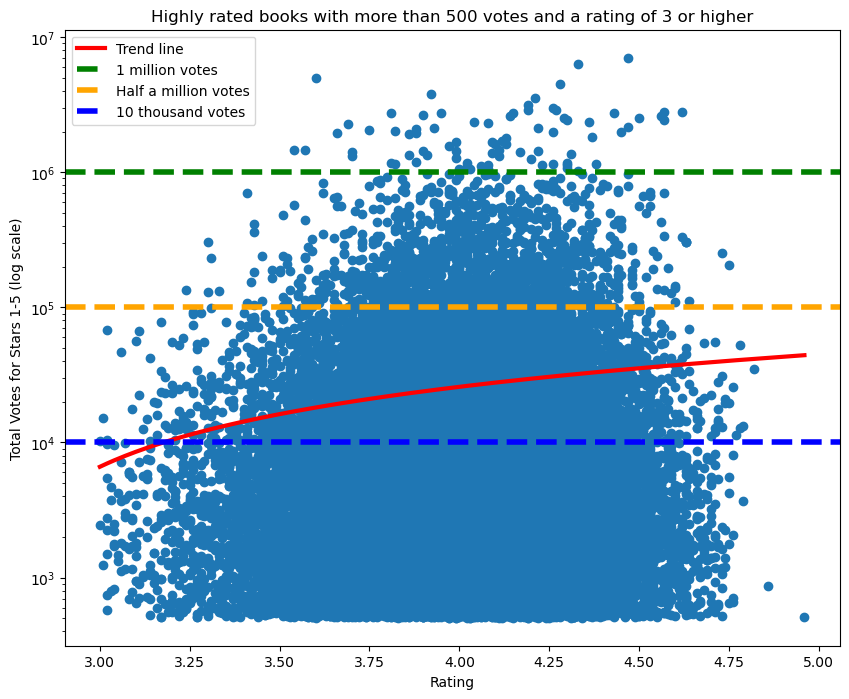

In [36]:
from sklearn.linear_model import LinearRegression

# Filter books with a total of more than 500 votes and a rating of 3 or higher
highly_voted_books = filtered_ratings[(filtered_ratings['total_votes'] > 500) & (filtered_ratings['rating'] >= 3)]

# Sort by rating in descending order
highly_voted_books = highly_voted_books.sort_values('rating', ascending=False)

# Plot the chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(highly_voted_books['rating'], highly_voted_books['total_votes'])
ax.set_xlabel('Rating')
ax.set_ylabel('Total Votes for Stars 1-5 (log scale)')
ax.set_title('Highly rated books with more than 500 votes and a rating of 3 or higher')

# Add trend line
X = highly_voted_books['rating'].values.reshape(-1, 1)
y = highly_voted_books['total_votes'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax.plot(X, reg.predict(X), color='red', linewidth=3, label='Trend line')

# Add lines for 1 million, half a million, and 10 thousand votes
ax.axhline(y=1e6, color='green', linestyle='--', linewidth=4, label='1 million votes')
ax.axhline(y=1e5, color='orange', linestyle='--', linewidth=4, label='Half a million votes')
ax.axhline(y=1e4, color='blue', linestyle='--', linewidth=4, label='10 thousand votes')

ax.set_yscale('log')  # Set y-axis to log scale
ax.legend()  # Add legend
plt.show()


Based on the scatter plot and trend line in this figure, it appears that there is a positive correlation between the number of votes a book receives and its rating. In other words, the trend line suggests that as the count of votes for a book increases, its rating tends to increase as well.

##### HEXBIN PLOT

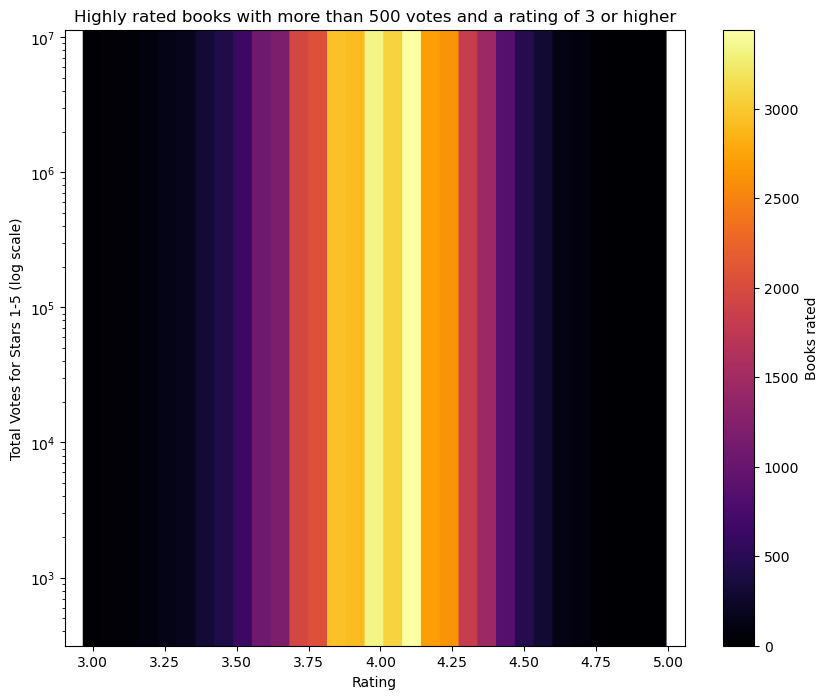

In [37]:
# Hexbin plot
fig, ax = plt.subplots(figsize=(10, 8))
hb = ax.hexbin(highly_voted_books['rating'], highly_voted_books['total_votes'], gridsize=30, cmap='inferno')
ax.set_xlabel('Rating')
ax.set_ylabel('Total Votes for Stars 1-5 (log scale)')
ax.set_title('Highly rated books with more than 500 votes and a rating of 3 or higher')

# Add colorbar
cb = fig.colorbar(hb)
cb.set_label('Books rated')

ax.set_yscale('log')  # Set y-axis to log scale
plt.show()
